In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
dfam= pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [9]:
dfam.shape

(2443651, 9)

In [12]:
dfam.head(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers



###Part 1: Understanding Product Categories

<Axes: xlabel='category'>

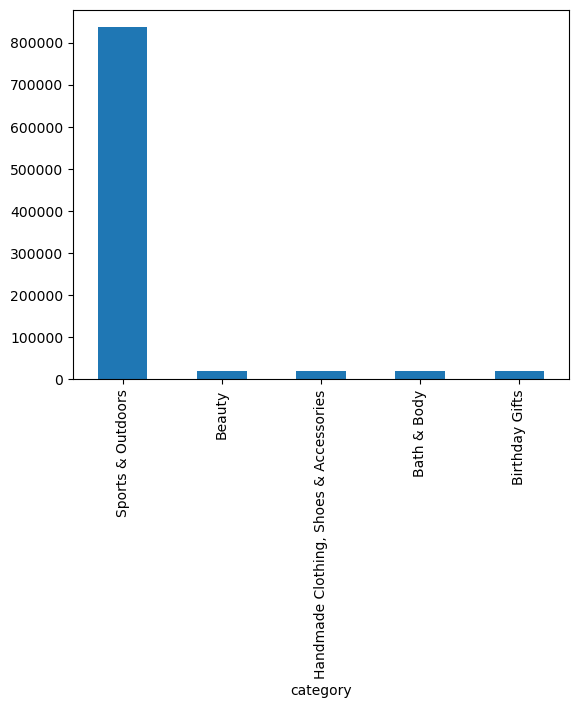

In [31]:
dfcate=dfam['category'].value_counts().head(5)
dfcatepro=dfam['category'].value_counts(normalize=True).head(5)
dfcate2 = pd.concat([dfcate, dfcatepro], axis=0)
dfcate.plot.bar()

###Part 2:Delving into Product Pricing

En el siguiente value_counts() podemos observar que hay un gran número de productos que comparten un mismo precio. Destaca también que existe una gran cantidad de ellos que terminan en 99 centimos

In [35]:
dfam['price'].value_counts()

price
9.99       48922
12.99      38823
8.99       34058
7.99       33632
14.99      32570
           ...  
2398.99        1
1453.08        1
1785.63        1
1347.36        1
317.34         1
Name: count, Length: 82916, dtype: int64

Calcule la media, mediana y moda del precio de los productos.
¿Cuál es el precio promedio de los productos enumerados? ¿Cómo se compara esto con el precio más común (modo)?
Medidas de dispersión:
Determine la varianza, la desviación estándar, el rango y el rango intercuartil del precio del producto.
¿Qué tan variados son los precios de los productos? ¿Hay algún indicador de una diferencia significativa en los precios?
Visualizaciones:

In [37]:
dfam['price'].describe().round(2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

Y aquí está la moda.

In [65]:
dfam['price'].var()

119445.48532256528

In [38]:
dfam['price'].mode()

0    9.99
Name: price, dtype: float64

Aqui se presenta un historiograma de los precios, pero al ser unos precios muy localizados no tiene sentido que se represente de esta manera. Posibles soluciones sería la representación por franjas de precios que sean menores en productos más bajos,de euro en euro, mientras que en los precios más altos se aglutinaran hasta de 1000 en 1000. Otra opción, por si hay grandes lagunas es cortar las grandes franjas sin valores para poder darle espacio a la representación de algunos.

<Axes: ylabel='Frequency'>

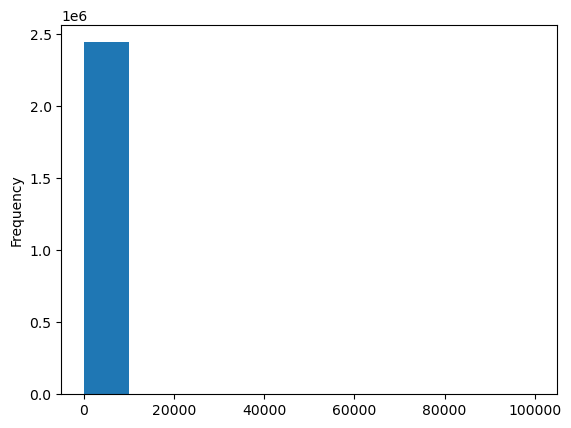

In [43]:
dfam['price'].plot.hist()

<Axes: >

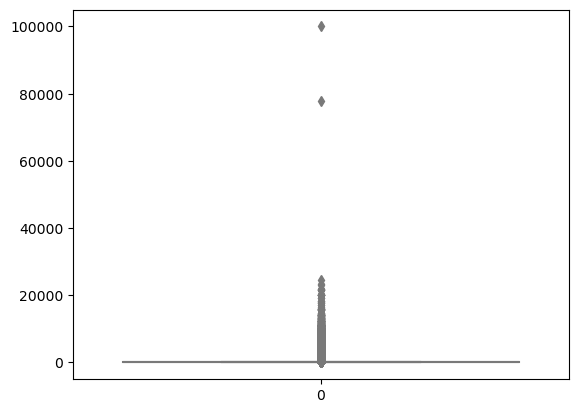

In [47]:
sns.boxplot(data = dfam['price'], color="lightblue")

Part 3: Unpacking Product Ratings.

In [82]:
dfam['stars'].round(2).var()

4.81743402976196

In [75]:
print('La moda es:',dfam['stars'].mode(),'La media es:',dfam['stars'].mean().round(2),'La mediana es:',dfam['stars'].median())

La moda es: 0    0.0
Name: stars, dtype: float64 La media es: 2.15 La mediana es: 0.0


In [78]:
dfam['stars'].describe().round(2)

count    2443651.00
mean           2.15
std            2.19
min            0.00
25%            0.00
50%            0.00
75%            4.40
max            5.00
Name: stars, dtype: float64

<Axes: ylabel='Frequency'>

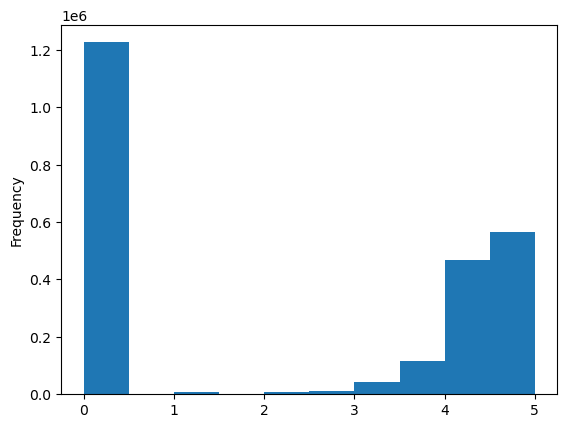

In [76]:
dfam['stars'].plot.hist()

Con estos datos nos surge la teoría de que si la gente no realiza la evaluación significa que no tiene puntos y por lo tanto es cero y este número aumenta mucho o, también puede darse el caso de que la gente no evalue tanto. Esto hace que los 0 sean tan importantes.

CONCLUSIONES:
    -Muchos productos con precios concretos y para su análisis tendríamos que concretar los arcos de análisis para compensar un poco la situación.
    -Las evaluaciones no están bien recogidas o por lo menos reflejan una realidad que no tiene porque ser la realidad al 100%